In [2]:
%load_ext autoreload
%autoreload 2

from heizlast import House, WeatherData

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
climate = WeatherData()

climate.load_data()

sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredict

In [68]:
# Haus erstellen und Wand hinzufügen
house = House()
house.add_wall(
    name='Außenwand',
    area=250.0, 
    layers_info=[
        {'name': 'Innenputz aus Gipsputzmörtel', 'thickness': 0.02, 'thermal_conductivity': 0.7},
        {'name': 'Ziegel', 'thickness': 0.38, 'thermal_conductivity': 0.6},
        {'name': 'Dämmung', 'thickness': 0.3, 'thermal_conductivity': 0.06},
        {'name': 'Kunstharzputz', 'thickness': 0.02, 'thermal_conductivity': 0.7},
        ]
    )

house.add_roof(
    area=8.6*8.4*1.2, 
    layers_info=[
        {'name': 'Gipskartonplatte', 'thickness': 0.0125, 'thermal_conductivity': 0.21},
        {'name': 'Luftschicht (Lattung vernachlässigt)', 'thickness': 0.0, 'thermal_conductivity': 0.6},
        {'name': 'Spannplatte', 'thickness': 0.026, 'thermal_conductivity': 0.17},
        {'name': 'Traglattung (licht. Abstand 0,54m)', 'thickness': 0.00, 'thermal_conductivity': 0.7},
        {'name': 'Sparren', 'thickness': 0.0, 'thermal_conductivity': 0.7},
        {'name': 'Spannplatte', 'thickness': 0.0, 'thermal_conductivity': 0.7},
        ]
)

house.calc_annual_transmission_heat_loss()

print(house.annual_transmission_heat_loss)

44295.67875039708


In [69]:
house.calc_annual_transmission_heat_loss_timeseries(climate.data)

<Axes: xlabel='date'>

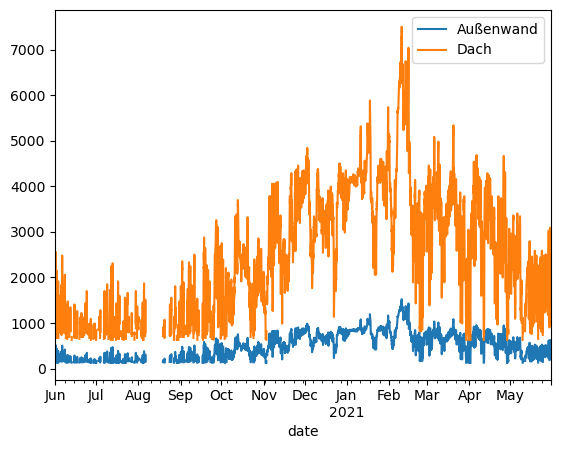

In [70]:
house.transmission_heat_loss_ts.plot()